In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns


In [17]:
X,y  = make_circles(n_samples=100 , noise =0.1 , random_state=1)

<Axes: >

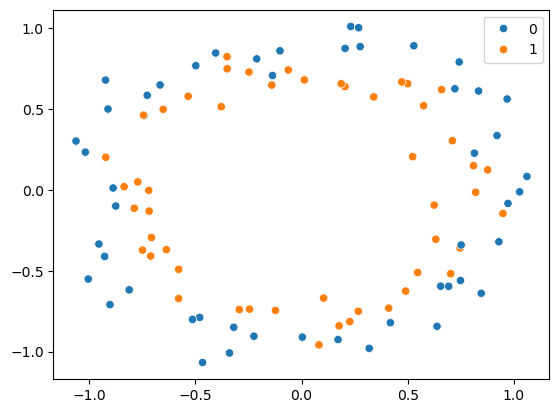

In [18]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                      test_size=0.2,
                                                      random_state=2)

In [20]:
model = Sequential()

model.add(Dense(256, input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\itsam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])

In [23]:
history = model.fit(X_train , y_train , validation_data=(X_test,y_test) , epochs=500 , verbose=0  )

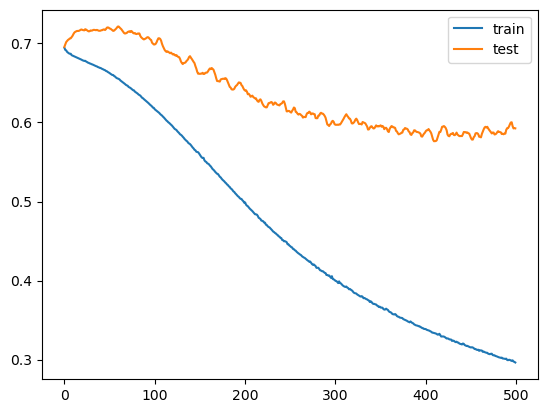

In [24]:
plt.plot(history.history['loss'] , label='train')
plt.plot(history.history['val_loss'] ,label='test')

plt.legend()
plt.show()

### Early Stopping

In [25]:
model = Sequential()

model.add(Dense(256 , input_dim = 2 , activation='relu'))
model.add(Dense(1 , activation ='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [32]:
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [33]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5625 - loss: 0.6785 - val_accuracy: 0.4000 - val_loss: 0.7184
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5312 - loss: 0.6814 - val_accuracy: 0.3500 - val_loss: 0.7196
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5781 - loss: 0.6753 - val_accuracy: 0.3500 - val_loss: 0.7216
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5781 - loss: 0.6738 - val_accuracy: 0.3500 - val_loss: 0.7226
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5922 - loss: 0.6719 - val_accuracy: 0.3500 - val_loss: 0.7227
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5844 - loss: 0.6739 - val_accuracy: 0.3500 - val_loss: 0.7221
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5570 - loss: 0.6785 - val_accuracy: 0.3500 - val_loss: 0.7207
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5703 - loss: 0.6711 - val_accuracy: 0.3500 - v

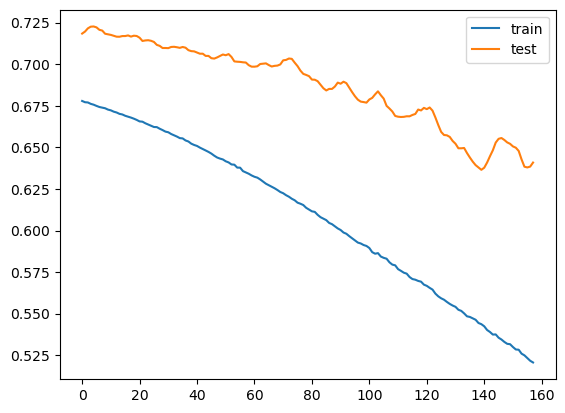

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 764us/step


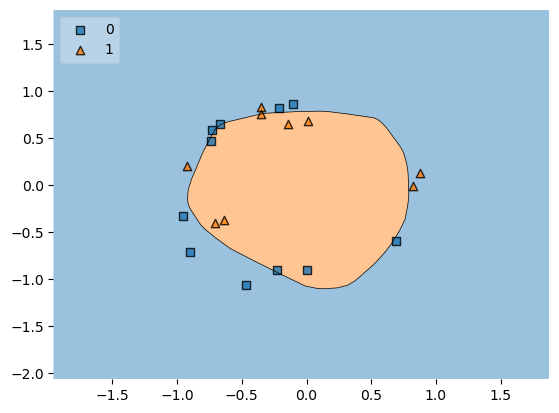

In [35]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()